In [182]:
%reset
# import get_marked2pt as m2pt
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import dill
import sys, os
from astropy.io import fits
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis'
# import camb
# import LSS_funcs as ghmf
# import general_funcs as gnf
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import pickle as pk




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


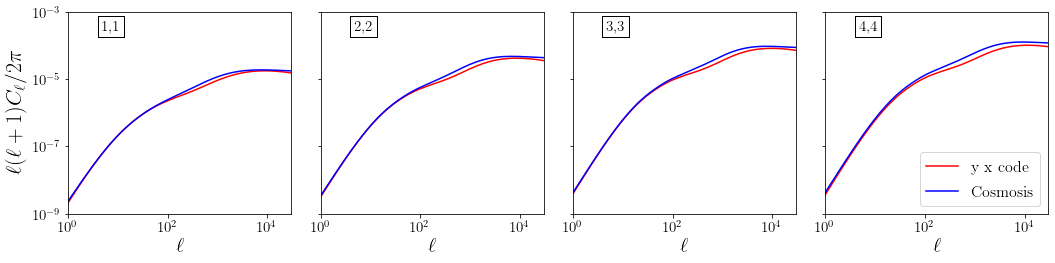

In [11]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_fourier_meadmodv4_20_al1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]
    if jf == 0:        
        DV = dill.load(open(tf_name,'rb'))
    else:
        df = fits.open(tf_name)
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        value = df['xip'].data['VALUE']
        angle = df['xip'].data['ANG']

 
    for j2 in range(4):
        if jf == 0:
            Cl_val = DV.Cl_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]['tot']
            ell_val = DV.Cl_result_dict['l_array']
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            Cl_val = value[ind_sel]
            ell_val = angle[ind_sel]

        ax[j2].errorbar(ell_val, (ell_val)*(ell_val)*Cl_val/(2*np.pi), ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,30000))
        ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_mead.pdf')


    








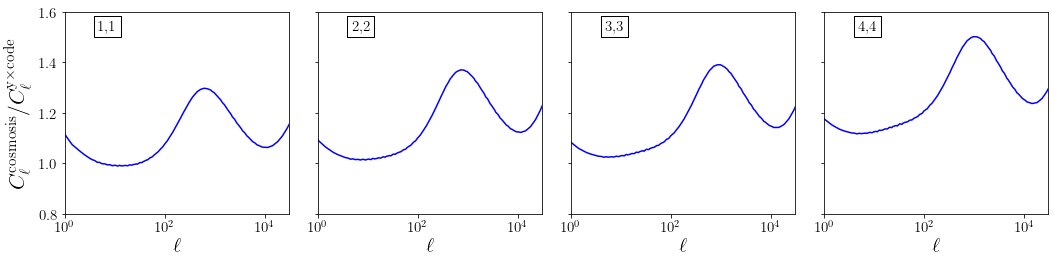

In [9]:
import scipy.interpolate as interpolate


fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_fourier_meadmodv4_20_al1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

ellmin = 1.0
ellmax = 1e4

for j2 in range(4):
    for jf in range(len(fnames)):
        tf_name = fdir + fnames[jf]
        if jf == 0:        
            DV = dill.load(open(tf_name,'rb'))
        else:
            df = fits.open(tf_name)
            bin1 = df['xip'].data['BIN1']
            bin2 = df['xip'].data['BIN2']
            value = df['xip'].data['VALUE']
            angle = df['xip'].data['ANG']

 
    
        if jf == 0:
            Cl_yx = DV.Cl_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]['tot']
            ell_yx = DV.Cl_result_dict['l_array']
            Cl_yx_interp = interpolate.interp1d(np.log(ell_yx),np.log(Cl_yx))
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            Cl_cos = value[ind_sel]
            ell_cos = angle[ind_sel]
            Cl_yx_ellcos = np.exp(Cl_yx_interp(np.log(ell_cos)))

            ax[j2].errorbar(ell_val, Cl_cos/Cl_yx_ellcos, ls='-',color=colors[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,30000))
        ax[j2].set_ylim((0.8,1.6))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$C^{\rm cosmosis}_{\ell}/C^{\rm y \times code}_{\ell}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_ratio_mead.pdf')


    









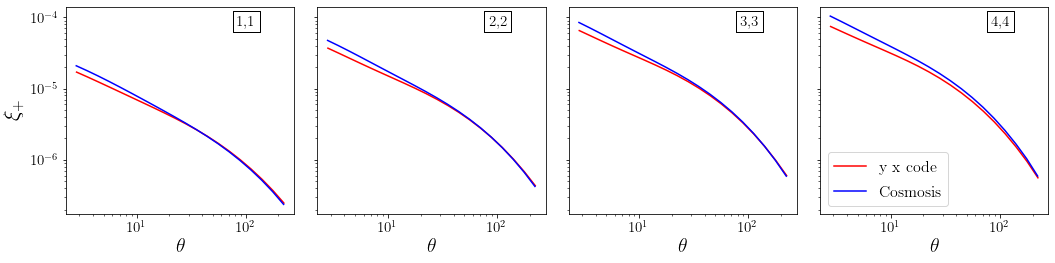

In [6]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw_rsgrs1.pk','save_shear_shear_real_halofit.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_real_meadmodv4_20_al1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]
    if jf == 0:        
        DV = dill.load(open(tf_name,'rb'))
    else:
        df = fits.open(tf_name)
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        value = df['xip'].data['VALUE']
        angle = df['xip'].data['ANG']

 
    for j2 in range(4):
        if jf == 0:
            xi_val = DV.xi_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]
            th_val = DV.xi_result_dict['kk']['theta']
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            xi_val = value[ind_sel]
            th_val = angle[ind_sel]

        ax[j2].errorbar(th_val, xi_val, ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\theta$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((1.0,10000))
#         ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xiplus_kk_comp_mead.pdf')


    



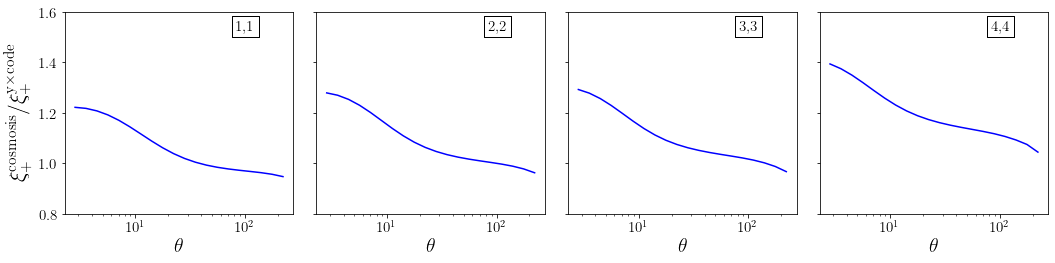

In [7]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_real_halofit.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_real_meadmodv4_20_al1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for j2 in range(4):
    for jf in range(len(fnames)):
        tf_name = fdir + fnames[jf]
        if jf == 0:        
            DV = dill.load(open(tf_name,'rb'))
        else:
            df = fits.open(tf_name)
            bin1 = df['xip'].data['BIN1']
            bin2 = df['xip'].data['BIN2']
            value = df['xip'].data['VALUE']
            angle = df['xip'].data['ANG']

 
    
        if jf == 0:
            xi_yx = DV.xi_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]
            th_yx = DV.xi_result_dict['kk']['theta']
            xi_yx_interp = interpolate.interp1d(np.log(th_yx),np.log(xi_yx),fill_value='extrapolate')
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            xi_cos = value[ind_sel]
            th_cos = angle[ind_sel]
            xi_yx_thcos = np.exp(xi_yx_interp(np.log(th_cos)))

            ax[j2].errorbar(th_cos, xi_cos/xi_yx_thcos, ls='-',color=colors[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\theta$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((1.0,10000))
        ax[j2].set_ylim((0.8,1.6))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi^{\rm cosmosis}_{+}/\xi^{\rm y \times code}_{+}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=16,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xiplus_kk_comp_mead_ratio.pdf')


    




In [193]:
pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_yx_rbvs_dndm_imead0.pk','rb'))
pkmm_cs = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_cosmosis_imead0.pk','rb'))




In [184]:
pkmm_yx['z']


array([0.01  , 0.0619, 0.1138, 0.1657, 0.2176, 0.2695, 0.3214, 0.3733,
       0.4252, 0.4771, 0.529 , 0.5809, 0.6328, 0.6847, 0.7366, 0.7885,
       0.8404, 0.8923, 0.9442, 0.9961, 1.048 , 1.0999, 1.1518, 1.2037,
       1.2556, 1.3075, 1.3594, 1.4113, 1.4632, 1.5151, 1.567 , 1.6189,
       1.6708, 1.7227, 1.7746, 1.8265, 1.8784, 1.9303, 1.9822, 2.0341,
       2.086 , 2.1379, 2.1898, 2.2417, 2.2936, 2.3455, 2.3974, 2.4493,
       2.5012, 2.5531, 2.605 , 2.6569, 2.7088, 2.7607, 2.8126, 2.8645,
       2.9164, 2.9683, 3.0202, 3.0721, 3.124 , 3.1759, 3.2278, 3.2797,
       3.3316, 3.3835, 3.4354, 3.4873, 3.5392, 3.5911, 3.643 , 3.6949,
       3.7468, 3.7987, 3.8506, 3.9025, 3.9544, 4.0063, 4.0582, 4.1101,
       4.162 , 4.2139, 4.2658, 4.3177, 4.3696, 4.4215, 4.4734, 4.5253,
       4.5772, 4.6291, 4.681 , 4.7329, 4.7848, 4.8367, 4.8886, 4.9405,
       4.9924, 5.0443, 5.0962, 5.1481, 5.2   ])

In [185]:
pkmm_cs['z']


array([0.01      , 0.0619    , 0.11379999, 0.16569999, 0.21759999,
       0.26949996, 0.32139996, 0.37329996, 0.42519996, 0.47709996,
       0.52899992, 0.58089995, 0.63279992, 0.68469995, 0.73659992,
       0.78849989, 0.84039992, 0.89229995, 0.94419992, 0.99609995,
       1.04799986, 1.09989989, 1.15179992, 1.20369983, 1.25559986,
       1.30749989, 1.35939991, 1.41129994, 1.46319985, 1.51509988,
       1.56699979, 1.61889982, 1.67079985, 1.72269988, 1.77459991,
       1.82649982, 1.87839985, 1.93029988, 1.98219991, 2.03409982,
       2.08599973, 2.13789988, 2.18979979, 2.24169993, 2.29359984,
       2.34549975, 2.39739966, 2.44929981, 2.50119972, 2.55309987,
       2.60499978, 2.65689969, 2.70879984, 2.76069975, 2.8125999 ,
       2.86449981, 2.91639972, 2.96829987, 3.02019978, 3.07209969,
       3.1239996 , 3.17589974, 3.22779965, 3.2796998 , 3.33159971,
       3.38349986, 3.43539977, 3.48729968, 3.53919983, 3.59109974,
       3.64299965, 3.69489956, 3.74679971, 3.79869962, 3.85059

In [186]:
pkmm_cs['Pktot'].shape, pkmm_yx['Pktot'].shape



((101, 2000), (101, 2000))

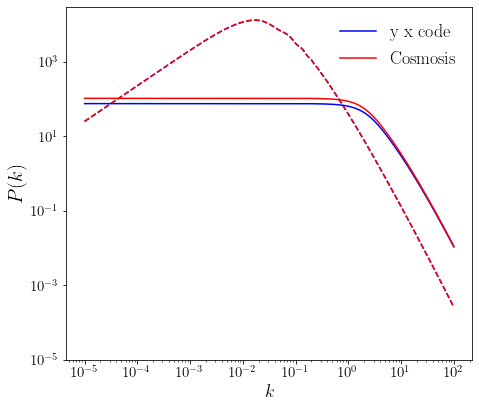

In [195]:
from scipy import interpolate
zv = 0.67
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='--',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()











In [191]:
Pk1h_cs_interp(pkmm_yx['k'])


array([1.03720245e+02, 1.03720215e+02, 1.03720230e+02, ...,
       1.15651786e-02, 1.13197314e-02, 1.10789193e-02])

In [194]:
pkmm_yx['Pk1h'][ind_zv_yx,:]



array([7.47982443e+01, 7.47982377e+01, 7.47982441e+01, ...,
       1.11066877e-02, 1.08721772e-02, 1.06421962e-02])

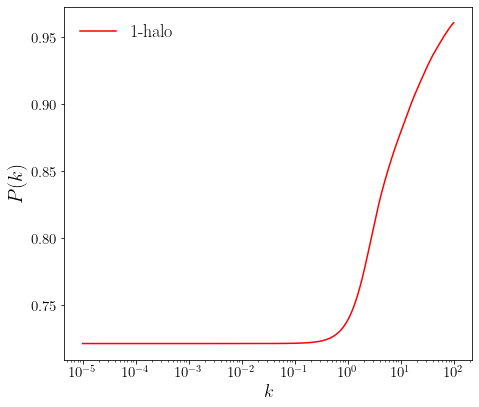

In [196]:
from scipy import interpolate
zv = 0.67
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:]/Pk2h_cs_interp(pkmm_yx['k']),ls='--',marker='',elinewidth=2.0,color='blue',label=r'2-halo')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:]/Pk1h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red',label=r'1-halo')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()












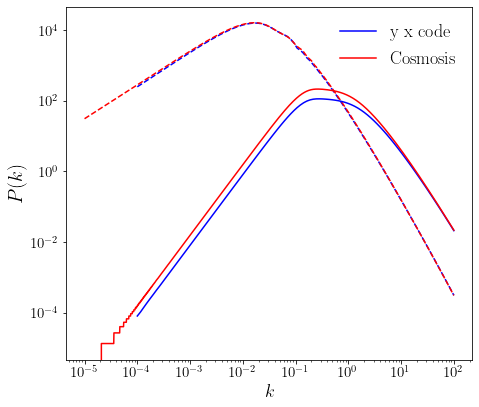

In [44]:
from scipy import interpolate
zv = 0.46
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:],ls='--',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:],label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







In [142]:
import colossus
from colossus.cosmology import cosmology
from colossus.lss import bias
from colossus.lss import mass_function
from colossus.halo import mass_so
from colossus.halo import mass_defs
from colossus.halo import concentration

cosmo_params = {'flat': True, 'H0': 67.31, 'Om0': 0.315, 'Ob0': 0.044, 'sigma8': 0.87187, 'ns': 0.96, 'relspecies': False}

cosmology.addCosmology('mock_cosmo', cosmo_params)
cosmo_colossus = cosmology.setCosmology('mock_cosmo')



In [143]:
dndmdict = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/dndmdict_comp_interp.pk','rb'))

z_yx = dndmdict['z_yx']
z_array_block = dndmdict['z_block']

zv = 0.67
ind_zv_yx = np.where(z_yx > zv)[0][0]
ind_zv_cs = np.where(z_array_block > zv)[0][0]

M_yx = dndmdict['M_yx']
dndm_yx = dndmdict['dndm_yx'][ind_zv_yx,:]
nu_block = dndmdict['nu_block'][ind_zv_cs,:]
gm_block = dndmdict['gm_block'][ind_zv_cs,:]
M_block = dndmdict['M_block'][ind_zv_cs,:]


In [144]:
z_yx[ind_zv_yx] - z_array_block[ind_zv_cs]



0.055686209082983384

In [134]:
# mdef = 'fof'
# dndm_model = 'sheth99'
# dndm_yx = (1. / M_yx) * mass_function.massFunction(M_yx, zv,mdef=mdef, model=dndm_model,q_out='dndlnM')




In [135]:
rho_m = (2.775e11)*0.315

sp.integrate.simps( (M_yx/rho_m) * dndm_yx, M_yx) 

                  
                   

0.6167957197543499

In [136]:
sp.integrate.simps( gm_block, nu_block) 




0.7148633171716148

In [160]:
# dnu_dM = (nu_block[1:] - nu_block[:-1])/(M_block[1:] - M_block[:-1])
# gm_pl = (gm_block[1:] + gm_block[:-1])/2.
# M_pl = (M_block[1:] + M_block[:-1])/2.


gm_pl = np.exp((np.log(gm_block[1:]) + np.log(gm_block[:-1]))/2.)
M_pl = np.exp((np.log(M_block[1:]) + np.log(M_block[:-1]))/2.)
nu_pl = np.exp((np.log(nu_block[1:]) + np.log(nu_block[:-1]))/2.)
dnu_dM = (nu_pl/M_pl)*(np.log(nu_block[1:]) - np.log(nu_block[:-1]))/(np.log(M_block[1:]) - np.log(M_block[:-1]))



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [161]:
(0.322)*(np.sqrt(0.707*2/np.pi))



0.21602580893508844

In [162]:
import scipy.interpolate as interpolate
gpl_interp = interpolate.interp1d(np.log(M_pl),np.log(gm_pl*dnu_dM),fill_value='extrapolate')
gpl_yx = np.exp(gpl_interp(np.log(M_yx)))



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


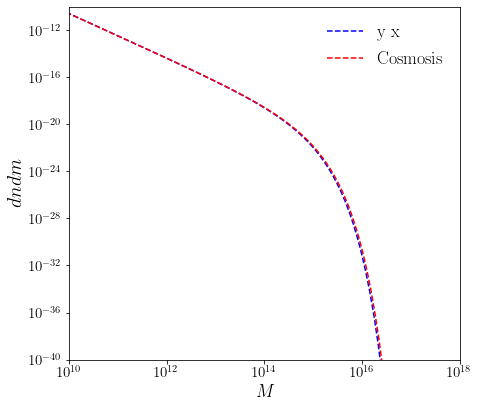

In [163]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_yx, dndm_yx,ls='--',marker='',elinewidth=2.0,color='blue',label='y x')
ax.errorbar(M_pl,gm_pl*dnu_dM * (rho_m/M_pl),ls='--',marker='',elinewidth=2.0,color='red',label='Cosmosis')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






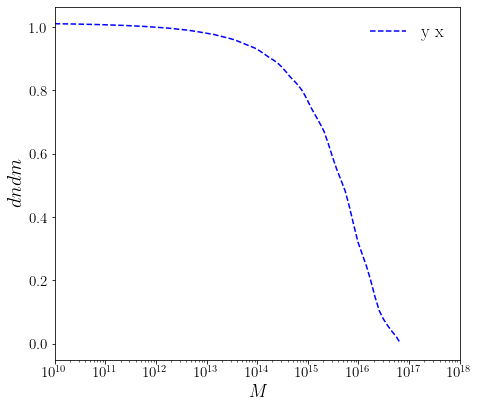

In [164]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_yx,(dndm_yx)/(gpl_yx* (rho_m/M_yx)),ls='--',marker='',elinewidth=2.0,color='blue',label='y x')
# ax.errorbar(M_pl,gm_pl*dnu_dM,ls='--',marker='',elinewidth=2.0,color='red',label='Cosmosis')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







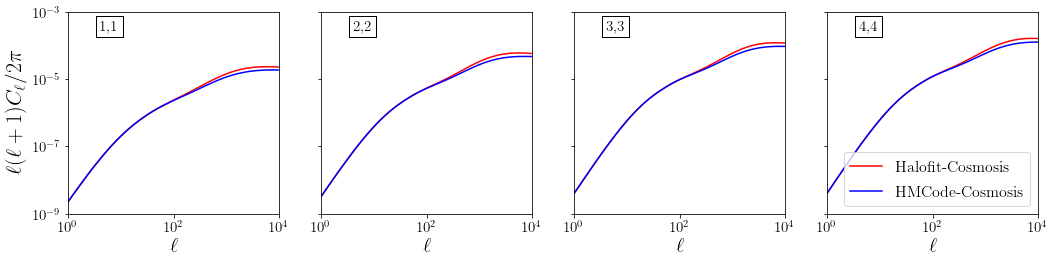

In [8]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
fnames = ['save_shear_shear_fourier_halofit.fits','save_shear_shear_fourier_meadmodv4_20_al1.fits']
labels = ['Halofit-Cosmosis','HMCode-Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]

    df = fits.open(tf_name)
    bin1 = df['xip'].data['BIN1']
    bin2 = df['xip'].data['BIN2']
    value = df['xip'].data['VALUE']
    angle = df['xip'].data['ANG']

 
    for j2 in range(4):

        ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
        Cl_val = value[ind_sel]
        ell_val = angle[ind_sel]

        ax[j2].errorbar(ell_val, (ell_val)*(ell_val)*Cl_val/(2*np.pi), ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,10000))
        ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_mead.pdf')


    









In [20]:
filename = '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/chains/chain_bP_linear_yshear_planckxdesy3_emcee.txt'
data = np.loadtxt(filename)

ntot = data.shape[0]
ind_sel = np.random.randint(0,ntot, 1000)




In [42]:
# ind_bf = np.where(data[ind_sel,-1] == np.max(data[ind_sel,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])

# ind_bf = np.where(data[:,-1] == np.max(data[:,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])


[799]
[[  1.27180854   2.2955644   -2.7080502  -16.11498816]]


In [23]:
bpz0 = data[ind_sel,0]
bp_alpha = data[ind_sel,1]

z_array = np.linspace(0,1,100)

z_vlj = 0.15
bp_vlj = 1.5135
bp_vlj_yp = 1.72972
bp_vlj_yn = 1.28378

z_des = np.array([0.23915211970074815,0.38204488778054857,0.5256857855361595,0.6783042394014961])
bp_des = np.array([1.5135135135135136,2.472972972972973,3.851351351351351,2.6148648648648645])
bp_des_p = np.array([2.0270,3.04729,4.6351,3.9729729])
bp_des_n = np.array([0.93918918,1.8918,2.95945,1.445945])



In [30]:
np.array([bp_des_p-bp_des,bp_des-bp_des_n]).T.shape


(4, 2)

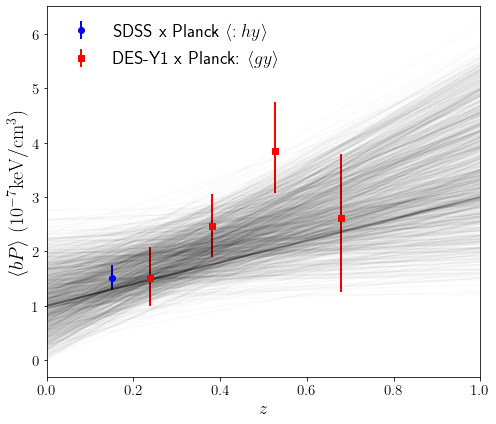

In [43]:
fig, ax = pl.subplots(1,1, figsize = (7,6))

for j in range(len(ind_sel)):
    bpzj = bpz0[j] + bp_alpha[j]*z_array
    ax.plot(z_array,  bpzj,alpha=0.02,color='black')
ax.errorbar(z_vlj,bp_vlj,yerr=np.array([[bp_vlj_yp-bp_vlj,bp_vlj-bp_vlj_yn]]).T,label=r'SDSS x Planck: $\langle hy \rangle$',ls='',marker='o',elinewidth=2.0,color='blue')
ax.errorbar(z_des,bp_des,yerr=np.array([bp_des_p-bp_des,bp_des-bp_des_n]),label=r'DES-Y1 x Planck: $\langle gy \rangle$',ls='',marker='s',elinewidth=2.0,color='red')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$z$', size = 18)
ax.set_ylabel(r'$\langle bP \rangle $   $(10^{-7} {\rm keV}/{{\rm cm}^3})$', size = 20)
# ax.set_ylim(1e-18,1e-10)
ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()














In [50]:
import pickle as pk
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'),encoding='latin1')

xi_gty_data = df['mean'][80:]
xi_gty_cov = df['cov_total'][80:,:][:,80:]
xi_gty_sig = np.sqrt(np.diag(xi_gty_cov))


In [51]:
thf = np.loadtxt('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/xi_gy_2h_bp.txt')
thf.shape


(20, 5)

In [52]:
df['xcoord_all']


(8, 20)

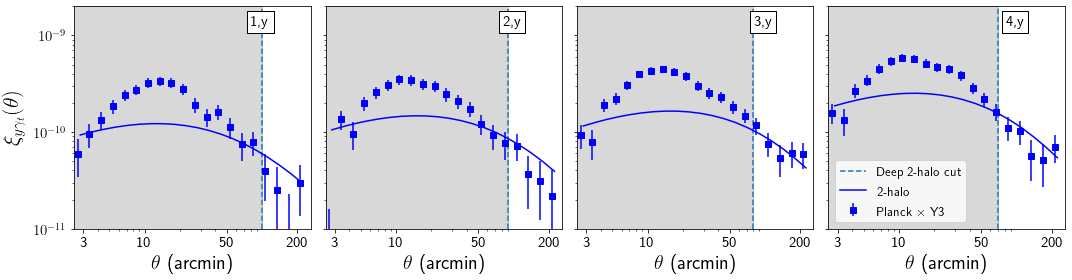

In [54]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


# file_names = ['/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk',
# ]

# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'),encoding='latin1')

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
hline_array = [100.,90.,80,70]
for j1 in range(1):    
    for j2 in range(4):
        wtheta_ygt_1 = thf[:,j2+1]
        
        theta = thf[:,0]
    
        if j1 == 0:            
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label=r'2-halo')
            ax[j2].axvline(hline_array[j2],ls='--',label='Deep 2-halo cut')
            ax[j2].axvspan(0,hline_array[j2],color='gray',alpha=0.3)
#             ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = xi_gty_data[20*j2:20*(j2+1)]
            yk_th_g = df['xcoord_all'][j2,:]
            yk_err = xi_gty_sig[20*j2:20*(j2+1)]
            
#             yk_cov = df['Yshear_y3'][str(j2)]['cov']
#             inv_cov_bin = QR_inverse(yk_cov)
#             snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
#             print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.5,260))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_allbins_bPe_planckxy3.pdf')



















